In [4]:
#import libraries
import pandas as pd

import numpy as np

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (confusion_matrix, accuracy_score)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
#save the take hoem csv as user_df
user_df = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [7]:
#examining first 5 rows
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Presently, there are some null values in a couple of columns. Also, the date columns are not formatted correctly, so we'll do that next.

In [9]:
#convert to datetime format
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'], unit = 's')

In [10]:
#filling up null invited_by_user_id column by 0
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].fillna(0)

In [11]:
#labeling the invited_by_user_id as 1 when invited and 0 other wise
user_df['invited_by_user_id'] = np.where(user_df['invited_by_user_id']>0, 1, 0)

In [12]:
#checking value counts
user_df['invited_by_user_id'].value_counts()

invited_by_user_id
1    6417
0    5583
Name: count, dtype: int64

In [13]:
#filling up the null last_session_creation_time with creation_time values
user_df['last_session_creation_time'] = user_df['last_session_creation_time'].fillna(user_df['creation_time'])

In [14]:
#saving the takehome user enagagement into a dataframe
user_eng_df =  pd.read_csv('takehome_user_engagement.csv')

In [15]:
#examining first few rows
user_eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
#cehcking the info
user_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [17]:
#checking the value counts for visited column
user_eng_df['visited'].value_counts()

visited
1    207917
Name: count, dtype: int64

In [18]:
#convert time stamp column to date time format
user_eng_df['time_stamp'] = pd.to_datetime(user_eng_df['time_stamp'])

In [19]:
#get a rolling count of visited column for 7 days
user_eng_df_grouped = pd.DataFrame(user_eng_df.groupby('user_id').rolling('7D',
                                                                          on='time_stamp')['visited'].count()).reset_index()

In [20]:
user_eng_df_grouped.head(20)

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
5,2,2013-12-31 03:45:04,2.0
6,2,2014-01-08 03:45:04,1.0
7,2,2014-02-03 03:45:04,1.0
8,2,2014-02-08 03:45:04,2.0
9,2,2014-02-09 03:45:04,3.0


In [21]:
#labeling the adopted user as 1 wherever the visited column shows 3 more more visits
user_eng_df_grouped['adopted_user'] = np.where(user_eng_df_grouped['visited'] >= 3, 1, 0)

In [22]:
user_eng_df_grouped.head(20)

,user_id,time_stamp,visited,adopted_user
0,1,2014-04-22 03:53:30,1.0,0
1,2,2013-11-15 03:45:04,1.0,0
2,2,2013-11-29 03:45:04,1.0,0
3,2,2013-12-09 03:45:04,1.0,0
4,2,2013-12-25 03:45:04,1.0,0
5,2,2013-12-31 03:45:04,2.0,0
6,2,2014-01-08 03:45:04,1.0,0
7,2,2014-02-03 03:45:04,1.0,0
8,2,2014-02-08 03:45:04,2.0,0
9,2,2014-02-09 03:45:04,3.0,1


In [23]:
#group by user_id
adopted_df = pd.DataFrame(user_eng_df_grouped.groupby('user_id')['adopted_user'].sum()>=1).reset_index()
adopted_df = adopted_df.astype('int64')
adopted_df.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [24]:
#get a count of adopted users
adopted_df[adopted_df['adopted_user']==1].count()

user_id         1602
adopted_user    1602
dtype: int64

In [25]:
#merge with the user_df on object_id
df = pd.merge(user_df, adopted_df, how='left', left_on='object_id', right_on='user_id').drop(['user_id'], axis=1)
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,1,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,1,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,1,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
 10  adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)


In [27]:
#fill null adopted user values with 0
df['adopted_user'] = df['adopted_user'].fillna(0)

In [28]:
#get a ratio of total number of adopted users
df['adopted_user'][df['adopted_user']==1].count()/df['adopted_user'].count()

0.1335

In [29]:
#creating a new column as diffrence of creation and last login time
df['creation_login_diff'] = (df['last_session_creation_time'] - df['creation_time']).dt.days
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_login_diff
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,1,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,1.0,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,1,0.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,1,0.0,5


In [30]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_login_diff
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,1,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,1.0,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,1,0.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,1,0.0,5


In [31]:
#dropping irrelevant columns
df.drop(['creation_time', 'last_session_creation_time', 'name', 'email', 'org_id'], axis=1, inplace=True)

In [32]:
#set index as object_id
df = df.set_index('object_id')

In [33]:
#get dummies for categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_login_diff,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,
1,1,0,1,0.0,0,False,False,False,False
2,0,0,1,1.0,136,True,False,False,False
3,0,0,1,0.0,0,True,False,False,False
4,0,0,1,0.0,1,False,False,False,False
5,0,0,1,0.0,5,False,False,False,False


In [34]:
# craeting X and y as independent and depemdent variables, respectively
X = df.drop(['adopted_user'], axis=1)
y = df['adopted_user']

In [35]:
#splitting in test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

In [36]:
#using random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Accuracy on training set = {}'.format(rfc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(rfc.score(X_test, y_test)))

Accuracy on training set = 0.9866666666666667
Accuracy on test set = 0.9641666666666666


In [37]:
xgb = xgb.XGBClassifier()

In [38]:
#using XGB classifier
xgb.fit(X_train.values, y_train.values)

print('Train Accuracy: %.4f' %(accuracy_score(xgb.predict(X_train.values), y_train)))
print('Test Accuracy: %.4f' %(accuracy_score(xgb.predict(X_test.values), y_test)))

Train Accuracy: 0.9812
Test Accuracy: 0.9696


In [39]:
print(f"Confusion matrix: \n{confusion_matrix(y_test, xgb.predict(X_test.values))}")

Confusion matrix: 
[[2053   27]
 [  46  274]]


In [40]:
#get feature importance
imps = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imps

imps

creation_login_diff                   0.818994
creation_source_SIGNUP                0.038350
creation_source_ORG_INVITE            0.030077
enabled_for_marketing_drip            0.026669
opted_in_to_mailing_list              0.024734
creation_source_SIGNUP_GOOGLE_AUTH    0.023189
invited_by_user_id                    0.020121
creation_source_PERSONAL_PROJECTS     0.017866
dtype: float32

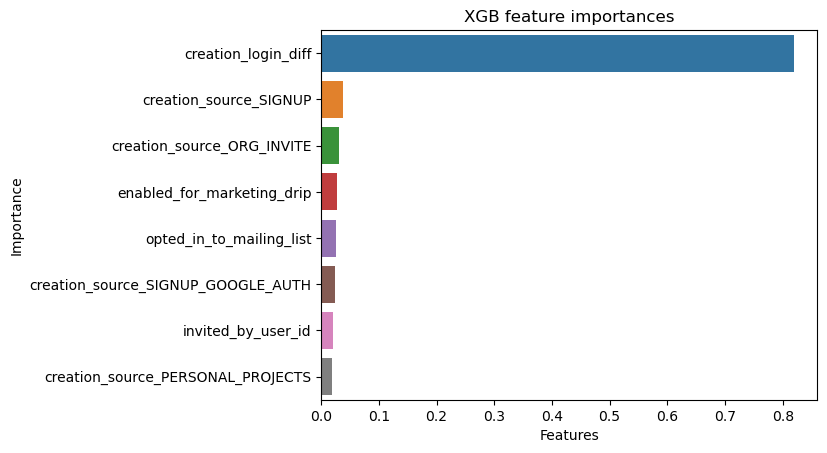

In [41]:
#plot feature importance
sns.barplot(x=imps, y=imps.index)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGB feature importances')
plt.show()

Based on our model, the top 5 features are:
- creation_login_diff - the longer the difference between creation date and last login, the larger the probability of user adoption
- creation source signup
- creation source googlr authorization
- opted into mailing list - incentivize for subscribing to the mailing list
- enabled for marketing drip -  again incentivize for sigining up

### Future Suggestions

To enhance the understanding of user adoption, further research could delve into qualitative data, such as user feedback and satisfaction surveys. Analyzing this alongside the existing quantitative metrics could reveal deeper insights into user behavior and preferences. Additionally, investigating external factors such as market trends or competitive landscape changes could provide context to the adoption patterns observed.

Exploring more granular user engagement data, like feature usage frequency or interaction times, could also offer valuable insights. Understanding how different user segments interact with the product can help tailor strategies to improve overall adoption. Further, employing advanced analytical techniques, such as machine learning models that consider temporal patterns or user segmentation, could uncover nuanced predictors of adoption not apparent in initial analyses.